<a href="https://colab.research.google.com/github/JohnOliver23/DatasetsML/blob/master/projeto_topicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import metrics 
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# =========== WINE =============
url_wine = "https://raw.githubusercontent.com/kmlporto/machinelearning/master/database/wine.data"
col_names_wine = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']
feature_cols_wine = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']

# =========== BALANCE-SCALE =============
url_balance_scale = "https://raw.githubusercontent.com/JohnOliver23/DatasetsML/master/database/balance-scale.data"
col_names_balance_scale = ['label', 'x1', 'x2', 'x3', 'x4']
feature_cols_balance_scale = ['x1', 'x2', 'x3', 'x4']

# ========== ABALONE ===========
url_abalone = "https://raw.githubusercontent.com/JohnOliver23/DatasetsML/master/database/abalone.data"
col_names_abalone = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
feature_cols_abalone = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

raw_dataset_wine = pd.read_csv( url_wine , header=None, names=col_names_wine) 
raw_dataset_balance_scale = pd.read_csv( url_balance_scale ,header=None, names=col_names_balance_scale) 
raw_dataset_abalone = pd.read_csv( url_abalone ,header=None, names=col_names_abalone)

In [194]:
# WINE DATASET TESTS

# Creating result vars 
wine_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 

wine_x = raw_dataset_wine[feature_cols_wine]
wine_y = raw_dataset_wine.label

x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(wine_x, wine_y, test_size=0.2, random_state=None, stratify=wine_y) 


#Tree
wine_tree = tree.DecisionTreeClassifier()
wine_tree = wine_tree.fit(x_train_wine, y_train_wine )
wine_test_result = wine_tree.predict(x_test_wine)

#Taxa de acertos Three
wine_results['tree']    =  metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# KNN n=5 

wine_knn5= KNeighborsClassifier(n_neighbors=5)
wine_knn5.fit(x_train_wine, y_train_wine)
wine_test_result = wine_knn5.predict(x_test_wine)

#Taxa de acertos Knn5
wine_results['knn5'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# KNN n=10 
wine_knn10 = KNeighborsClassifier(n_neighbors=10)
wine_knn10.fit(x_train_wine, y_train_wine)
wine_test_result = wine_knn10.predict(x_test_wine)

#Taxa de acertos Knn10
wine_results['knn10'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# MLP1 
wine_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#wine_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
wine_mlp1.fit(x_train_wine, y_train_wine )
wine_test_result = wine_mlp1.predict(x_test_wine)

wine_results['mlp1'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# MLP2 
wine_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#wine_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
wine_mlp2.fit(x_train_wine, y_train_wine)
wine_test_result = wine_mlp2.predict(x_test_wine)

wine_results['mlp2'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100


# Kmeans
wine_km = KMeans(n_clusters=3)
wine_km.fit(x_train_wine, y_train_wine)
wine_test_result = wine_km.predict(x_test_wine)


wine_results['kmeans'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

x = raw_dataset_wine.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorWineKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorWineKm.append(kmeans.inertia_)

print(wine_results)


Iteration 1, loss = 245.04830394
Iteration 2, loss = 241.88812250
Iteration 3, loss = 238.74915901
Iteration 4, loss = 235.63109560
Iteration 5, loss = 232.53409016
Iteration 6, loss = 229.45830970
Iteration 7, loss = 226.40397695
Iteration 8, loss = 223.37128537
Iteration 9, loss = 220.36039740
Iteration 10, loss = 217.37144321
Iteration 11, loss = 214.40451972
Iteration 12, loss = 211.45968917
Iteration 13, loss = 208.53697723
Iteration 14, loss = 205.63637089
Iteration 15, loss = 202.75781675
Iteration 16, loss = 199.90121977
Iteration 17, loss = 197.06644245
Iteration 18, loss = 194.25330428
Iteration 19, loss = 191.46158097
Iteration 20, loss = 188.69100336
Iteration 21, loss = 185.94125591
Iteration 22, loss = 183.21197485
Iteration 23, loss = 180.50274633
Iteration 24, loss = 177.81310480
Iteration 25, loss = 175.14253182
Iteration 26, loss = 172.49045548
Iteration 27, loss = 169.85625068
Iteration 28, loss = 167.23924020
Iteration 29, loss = 164.63869688
Iteration 30, loss = 16

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 94.44444444444444, 'knn5': 69.44444444444444, 'knn10': 77.77777777777779, 'mlp1': 50.0, 'mlp2': 61.111111111111114, 'kmeans': 8.333333333333332}


In [195]:
# balance_scale DATASET TESTS

# Creating result vars 
balance_scale_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 

balance_scale_x = raw_dataset_balance_scale[feature_cols_balance_scale]
balance_scale_y = raw_dataset_balance_scale.label

x_train_balance_scale, x_test_balance_scale, y_train_balance_scale, y_test_balance_scale = train_test_split(balance_scale_x, balance_scale_y, test_size=0.2, random_state=None, stratify=balance_scale_y) 


#Tree
balance_scale_tree = tree.DecisionTreeClassifier()
balance_scale_tree = balance_scale_tree.fit(x_train_balance_scale,y_train_balance_scale)
balance_scale_test_result = balance_scale_tree.predict(x_test_balance_scale)

#Taxa de acertos Three
balance_scale_results['tree']    =  metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# KNN n=5 

balance_scale_knn5= KNeighborsClassifier(n_neighbors=5)
balance_scale_knn5.fit(x_train_balance_scale, y_train_balance_scale)
balance_scale_test_result = balance_scale_knn5.predict(x_test_balance_scale)

#Taxa de acertos Knn5
balance_scale_results['knn5'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# KNN n=10 
balance_scale_knn10 = KNeighborsClassifier(n_neighbors=10)
balance_scale_knn10.fit(x_train_balance_scale,y_train_balance_scale)
balance_scale_test_result = balance_scale_knn10.predict(x_test_balance_scale)

#Taxa de acertos Knn10
balance_scale_results['knn10'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# MLP1 
balance_scale_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=300, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#balance_scale_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
balance_scale_mlp1.fit(x_train_balance_scale,y_train_balance_scale )
balance_scale_test_result = balance_scale_mlp1.predict(x_test_balance_scale)

balance_scale_results['mlp1'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# MLP2 
balance_scale_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=300, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#balance_scale_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
balance_scale_mlp2.fit(x_train_balance_scale,y_train_balance_scale)
balance_scale_test_result = balance_scale_mlp2.predict(x_test_balance_scale)

balance_scale_results['mlp2'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100


# Kmeans
balance_scale_km = KMeans(n_clusters=3)
balance_scale_km.fit(x_train_balance_scale,y_train_balance_scale)
balance_scale_test_result = balance_scale_km.predict(x_test_balance_scale)


balance_scale_results['kmeans'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

x = raw_dataset_balance_scale.iloc[:, [1,2,3,4]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorBalanceScaleKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorBalanceScaleKm.append(kmeans.inertia_)

print(balance_scale_results)

Iteration 1, loss = 2.23873592
Iteration 2, loss = 2.13039579
Iteration 3, loss = 2.03128199
Iteration 4, loss = 1.93977767
Iteration 5, loss = 1.85365416
Iteration 6, loss = 1.77472915
Iteration 7, loss = 1.70416565
Iteration 8, loss = 1.63853689
Iteration 9, loss = 1.57959867
Iteration 10, loss = 1.52449621
Iteration 11, loss = 1.47433109
Iteration 12, loss = 1.42994448
Iteration 13, loss = 1.38857598
Iteration 14, loss = 1.34947058
Iteration 15, loss = 1.31569953
Iteration 16, loss = 1.28403490
Iteration 17, loss = 1.25516201
Iteration 18, loss = 1.22807362
Iteration 19, loss = 1.20315192
Iteration 20, loss = 1.17831967
Iteration 21, loss = 1.15579363
Iteration 22, loss = 1.13439644
Iteration 23, loss = 1.11375405
Iteration 24, loss = 1.09466460
Iteration 25, loss = 1.07644642
Iteration 26, loss = 1.05939398
Iteration 27, loss = 1.04281765
Iteration 28, loss = 1.02749848
Iteration 29, loss = 1.01307774
Iteration 30, loss = 0.99898103
Iteration 31, loss = 0.98498690
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 59, loss = 0.96171766
Iteration 60, loss = 0.95178035
Iteration 61, loss = 0.94268171
Iteration 62, loss = 0.93288505
Iteration 63, loss = 0.92419060
Iteration 64, loss = 0.91391355
Iteration 65, loss = 0.90406708
Iteration 66, loss = 0.89326650
Iteration 67, loss = 0.88142602
Iteration 68, loss = 0.87024664
Iteration 69, loss = 0.85662081
Iteration 70, loss = 0.84236131
Iteration 71, loss = 0.82698841
Iteration 72, loss = 0.81128294
Iteration 73, loss = 0.79456279
Iteration 74, loss = 0.77640452
Iteration 75, loss = 0.76113486
Iteration 76, loss = 0.74851400
Iteration 77, loss = 0.73605348
Iteration 78, loss = 0.72458646
Iteration 79, loss = 0.71498846
Iteration 80, loss = 0.70508563
Iteration 81, loss = 0.69625047
Iteration 82, loss = 0.68679557
Iteration 83, loss = 0.67780688
Iteration 84, loss = 0.66833911
Iteration 85, loss = 0.65936474
Iteration 86, loss = 0.65037485
Iteration 87, loss = 0.64111736
Iteration 88, loss = 0.63225484
Iteration 89, loss = 0.62271671
Iteratio

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 77.60000000000001, 'knn5': 79.2, 'knn10': 84.8, 'mlp1': 88.0, 'mlp2': 87.2, 'kmeans': 0.0}


In [196]:
# ABALONE DATASET TESTS

# Creating result vars 
abalone_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 

abalone_x = raw_dataset_abalone[feature_cols_abalone]
abalone_y = raw_dataset_abalone.label

x_train_abalone, x_test_abalone, y_train_abalone, y_test_abalone = train_test_split(abalone_x, abalone_y, test_size=0.2, random_state=None, stratify=abalone_y) 


#Tree
abalone_tree = tree.DecisionTreeClassifier()
abalone_tree = abalone_tree.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_tree.predict(x_test_abalone)

#Taxa de acertos Three
abalone_results['tree']    =  metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# KNN n=5 

abalone_knn5= KNeighborsClassifier(n_neighbors=5)
abalone_knn5.fit(x_train_abalone, y_train_abalone)
abalone_test_result = abalone_knn5.predict(x_test_abalone)

#Taxa de acertos Knn5
abalone_results['knn5'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# KNN n=10 
abalone_knn10 = KNeighborsClassifier(n_neighbors=10)
abalone_knn10.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_knn10.predict(x_test_abalone)

#Taxa de acertos Knn10
abalone_results['knn10'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# MLP1 
abalone_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=300, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#abalone_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
abalone_mlp1.fit(x_train_abalone,y_train_abalone )
abalone_test_result = abalone_mlp1.predict(x_test_abalone)

abalone_results['mlp1'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# MLP2 
abalone_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=300, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#abalone_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
abalone_mlp2.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_mlp2.predict(x_test_abalone)

abalone_results['mlp2'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100


# Kmeans
abalone_km = KMeans(n_clusters=2)
abalone_km.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_km.predict(x_test_abalone)


abalone_results['kmeans'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

x = raw_dataset_abalone.iloc[:, [1,2,3,4,5,6,7,8]].values
kmeans = KMeans(n_clusters=2)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorAbaloneKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorAbaloneKm.append(kmeans.inertia_)

print(abalone_results)


Iteration 1, loss = 1.14412855
Iteration 2, loss = 1.13851444
Iteration 3, loss = 1.13422090
Iteration 4, loss = 1.13065984
Iteration 5, loss = 1.12695932
Iteration 6, loss = 1.12388990
Iteration 7, loss = 1.12098666
Iteration 8, loss = 1.11636818
Iteration 9, loss = 1.10091473
Iteration 10, loss = 1.09116195
Iteration 11, loss = 1.08365547
Iteration 12, loss = 1.07548506
Iteration 13, loss = 1.05518749
Iteration 14, loss = 1.03393579
Iteration 15, loss = 1.01878791
Iteration 16, loss = 1.00649012
Iteration 17, loss = 0.99302129
Iteration 18, loss = 0.98123590
Iteration 19, loss = 0.97063935
Iteration 20, loss = 0.96210886
Iteration 21, loss = 0.95189412
Iteration 22, loss = 0.94368650
Iteration 23, loss = 0.93753237
Iteration 24, loss = 0.92985745
Iteration 25, loss = 0.92448847
Iteration 26, loss = 0.91725271
Iteration 27, loss = 0.91349574
Iteration 28, loss = 0.90847359
Iteration 29, loss = 0.90436736
Iteration 30, loss = 0.90003264
Iteration 31, loss = 0.89834624
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 9, loss = 1.09840529
Iteration 10, loss = 1.09391545
Iteration 11, loss = 1.08990383
Iteration 12, loss = 1.08605066
Iteration 13, loss = 1.08244475
Iteration 14, loss = 1.07909499
Iteration 15, loss = 1.07576596
Iteration 16, loss = 1.07257576
Iteration 17, loss = 1.06941975
Iteration 18, loss = 1.06629069
Iteration 19, loss = 1.06319737
Iteration 20, loss = 1.05978225
Iteration 21, loss = 1.05657269
Iteration 22, loss = 1.05315402
Iteration 23, loss = 1.04979134
Iteration 24, loss = 1.04600806
Iteration 25, loss = 1.04240048
Iteration 26, loss = 1.03859685
Iteration 27, loss = 1.03467591
Iteration 28, loss = 1.03063634
Iteration 29, loss = 1.02665886
Iteration 30, loss = 1.02243340
Iteration 31, loss = 1.01813858
Iteration 32, loss = 1.01363203
Iteration 33, loss = 1.00938839
Iteration 34, loss = 1.00510566
Iteration 35, loss = 1.00060346
Iteration 36, loss = 0.99619954
Iteration 37, loss = 0.99187321
Iteration 38, loss = 0.98712054
Iteration 39, loss = 0.98272176
Iteratio

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 50.47846889952153, 'knn5': 52.751196172248804, 'knn10': 54.78468899521531, 'mlp1': 52.03349282296651, 'mlp2': 52.751196172248804, 'kmeans': 0.0}


# **Relatório de desempenho dos algoritimos**

## **Wine**

##### **Resultados Algoritmos**

In [197]:

pd.DataFrame.from_dict(wine_results, orient='index')

,0
tree,94.444444
knn5,69.444444
knn10,77.777778
mlp1,50.000000
mlp2,61.111111
kmeans,8.333333


##### **Curva de taxa de erro em iterações da MLP1**

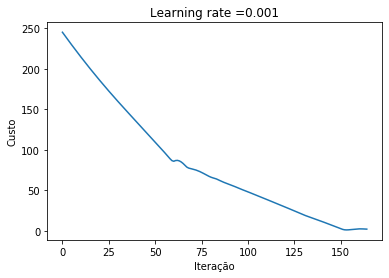

In [198]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(wine_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**

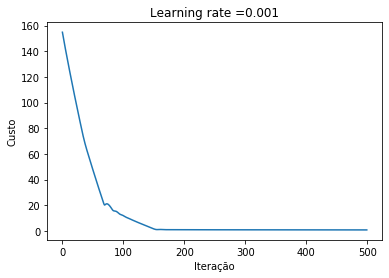

In [199]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(wine_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**

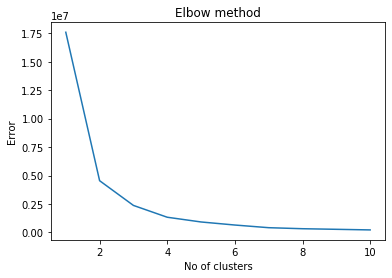

In [200]:


plt.plot(range(1,11), ErrorWineKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## **Balance Scale**

In [201]:
pd.DataFrame.from_dict(balance_scale_results, orient='index')

,0
tree,77.6
knn5,79.2
knn10,84.8
mlp1,88.0
mlp2,87.2
kmeans,0.0


##### **Curva de taxa de erro em iterações da MLP1**

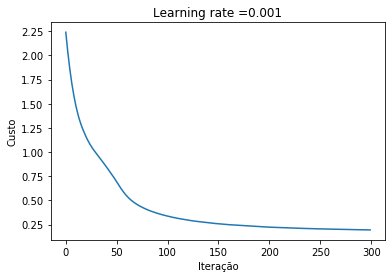

In [202]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(balance_scale_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**

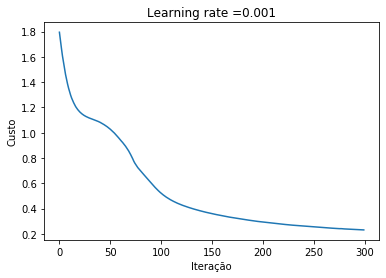

In [203]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(balance_scale_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**

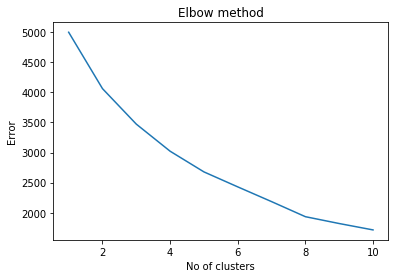

In [204]:
plt.plot(range(1,11), ErrorBalanceScaleKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## **Abalone**

In [205]:
pd.DataFrame.from_dict(abalone_results, orient='index')

,0
tree,50.478469
knn5,52.751196
knn10,54.784689
mlp1,52.033493
mlp2,52.751196
kmeans,0.000000


##### **Curva de taxa de erro em iterações da MLP1**

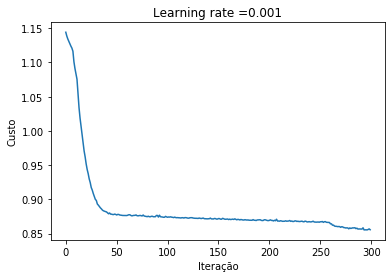

In [206]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(abalone_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**


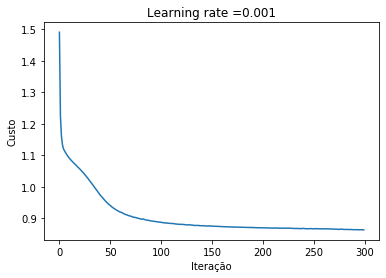

In [207]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(abalone_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**

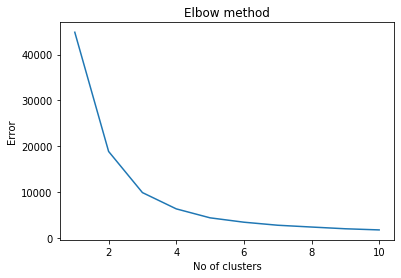

In [208]:
plt.plot(range(1,11), ErrorAbaloneKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()